In [1]:
import pandas as pd 

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:

import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

In [3]:
from nltk.stem import SnowballStemmer

In [4]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
df = pd.read_csv('/content/drive/MyDrive/ML project dataset/training.1600000.processed.noemoticon.csv',encoding='latin',names = ['polarity','id','date','query','user','text'])

In [7]:
df.head()

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
df.shape

(1600000, 6)

In [9]:
df = df.sample(frac=1,random_state=42)

# Exploratory data analysis

In [10]:
df.head()

,polarity,id,date,query,user,text
541200,0,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,0,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo..."
766711,0,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...
285055,0,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...
705995,0,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem


In [11]:
df['polarity'].unique()

array([0, 4])

In [12]:
df['polarity'] = df['polarity'].replace(4,1)
df.head()

,polarity,id,date,query,user,text
541200,0,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,0,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo..."
766711,0,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...
285055,0,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...
705995,0,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem


In [13]:
df.isnull().sum()

polarity    0
id          0
date        0
query       0
user        0
text        0
dtype: int64

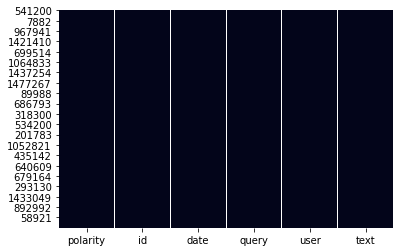

In [14]:
sns.heatmap(df.isnull(), cbar=False)

*So we can see that there are no null values present in any column*

In [ ]:
pd.set_option('display.max_colwidth', -1)
df[df['polarity']==1]['text'].head()
#so we can see that class 1 tweets reflects positivity

1006871    Sorry #Mtub, Not gonna come down. Don't care where my head's at, but I know she's more important to me  Coming home luv, We have alcohol?   
1355847    eating dinner then probably going to the party!!  I got the swag flu!!                                                                      
1038606    @anniee1234 yup. time went by really fast!!!                                                                                                
938064     Started writing short bday blog post this morning, ended up long &amp; introspective. Stayed to finish it, late to work - today I'm allowed 
1515645    Still some iphones top win on #squarespace !                                                                                                
Name: text, dtype: object

In [ ]:
pd.set_option('display.max_colwidth', -1)
df[df['polarity']==0]['text'].head()
#so we observed that tweets belonging to class 0 reflects negativity

582449    @peterfacinelli how cum now it says 200,000 nd smthing fllowers? Yuu cant loose peter Yuuu just CANT! And ii wants teh back of that chair 
405031    I am tired, but I cant sleep                                                                                                              
787670    I want SO badly to take offense to the ending of this video, but, I really can't.  - http://bit.ly/PQbgB                                  
214382    Onmy way home.. have nothing to do tonight...  I have no car either... Im gettingmyfreind Gav to start Twittering tonight! Yay x          
722379    is WAAAAAAAY too bored and going to pass out. i need you back up here! missing you                                                        
Name: text, dtype: object

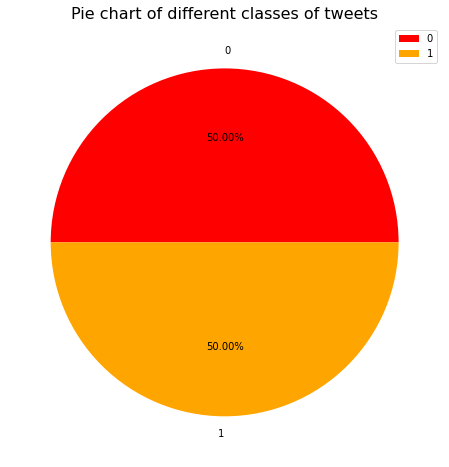

In [15]:
fig = plt.figure(figsize=(8,8))
targets = df.groupby('polarity').size()
targets.plot(kind='pie', subplots=True, figsize=(10, 8), autopct = "%.2f%%", colors=['red','orange'])
plt.title("Pie chart of different classes of tweets",fontsize=16)
plt.ylabel("")
plt.legend()
plt.show()

In [16]:
df1 = df

In [17]:
def change_dates(d):  
  date = d['date']
  date_splitted = date.str.split()
  weeks_list, month_list, day_list, time_list, PDT_list, year_list = [], [], [], [], [], []
  for dates in date_splitted:
    weeks_list.append(dates[0])
    month_list.append(dates[1])
    day_list.append(dates[2])
    time_list.append(dates[3])
    PDT_list.append(dates[4])
    year_list.append(dates[5])

  d['week'] = weeks_list
  d['month'] = month_list
  d['day'] = day_list
  d['time'] = time_list
  d['PDT'] = PDT_list
  d['year'] = year_list
  d = d.drop('date', axis=1) # Remove the date column
  return d


In [18]:
df1 = change_dates(df1)

In [19]:
df1.head()

,polarity,id,query,user,text,week,month,day,time,PDT,year
541200,0,2200003196,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,Tue,Jun,16,18:18:12,PDT,2009
750,0,1467998485,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",Mon,Apr,06,23:11:14,PDT,2009
766711,0,2300048954,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,Tue,Jun,23,13:40:11,PDT,2009
285055,0,1993474027,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,Mon,Jun,01,10:26:07,PDT,2009
705995,0,2256550904,NO_QUERY,yogicerdito,upper airways problem,Sat,Jun,20,12:56:51,PDT,2009


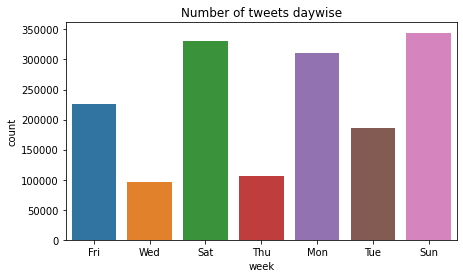

In [ ]:
# Visualizing the number of tweets posted in days of a week
plt.figure(figsize=(7,4))
plt.title('Number of tweets daywise')
sns.countplot(x='week',data=df1)

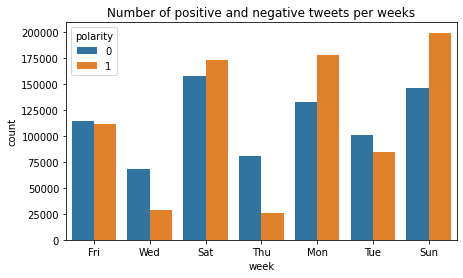

In [ ]:
# Visualizing the positive and negative tweets per weeks
plt.figure(figsize=(7,4))
plt.title('Number of positive and negative tweets per weeks')
sns.countplot(x='week', data=df1, hue='polarity' )

In [20]:
df['length'] = df.text.str.split().apply(len)

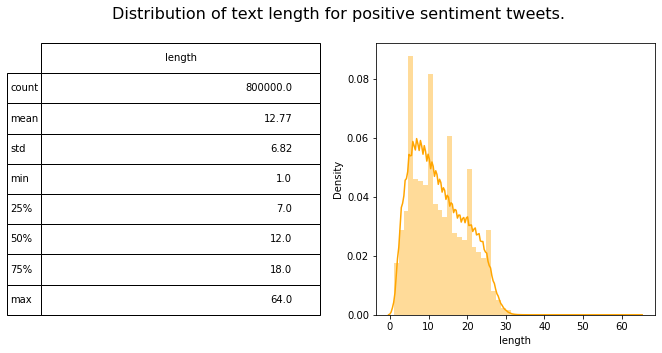

In [21]:
fig = plt.figure(figsize=(11,5))

ax1 = fig.add_subplot(122)
sns.distplot(df[df['polarity']==1]['length'], ax=ax1,color='orange')
describe = df.length[df.polarity==1].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 10
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

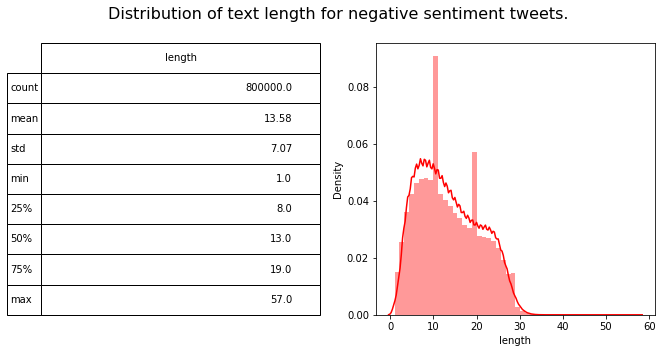

In [ ]:
fig = plt.figure(figsize=(11,5))

ax1 = fig.add_subplot(122)
sns.distplot(df[df['polarity']==0]['length'], ax=ax1,color='red')
describe = df.length[df.polarity==0].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 10
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for negative sentiment tweets.', fontsize=16)

plt.show()

In [ ]:
from wordcloud import STOPWORDS

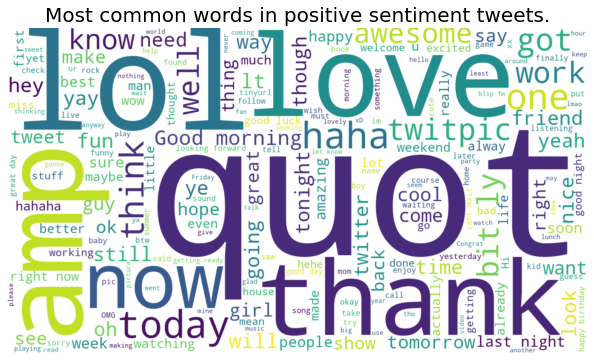

In [ ]:
plt.figure(figsize=(12,6))
word_cloud = WordCloud(stopwords = STOPWORDS, max_words = 200, width=1366, height=768, background_color="white").generate(" ".join(df[df.polarity==1].text))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most common words in positive sentiment tweets.',fontsize=20)
plt.show()


Based on the word cloud, it can be deduced that the most repeated words in tweets with positive sentiment are words such as: love, quot, lol, amp,haha,got, thank, today.

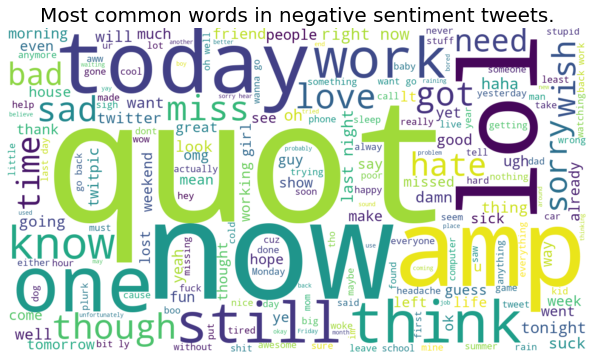

In [ ]:
plt.figure(figsize=(12,6))
word_cloud = WordCloud(stopwords = STOPWORDS, max_words = 200, width=1366, height=768, background_color="white").generate(" ".join(df[df.polarity==0].text))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most common words in negative sentiment tweets.',fontsize=20)
plt.show()


Based on the word cloud, we observed that the most repeated words in tweets with negative sentiment are words such as: quot, lol,today, amp which are the same as for positive sentiment class. However, there are also word occurrences from which negative sentiment of a tweet can be inferred such as: miss, sorry, hate,now etc.

# DATA PREPROCESSING 

In [22]:
final_df = df[['polarity','text']]

In [ ]:
final_df.head()

,polarity,text
541200,0,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,0,"@misstoriblack cool , i have no tweet apps fo..."
766711,0,@TiannaChaos i know just family drama. its la...
285055,0,School email won't open and I have geography ...
705995,0,upper airways problem


In [ ]:
final_df.shape

(1600000, 2)

**Data cleaning**

In [23]:
from string import punctuation
print("DATA CLEANING -- \n")

emoji_pattern = re.compile("["
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

DATA CLEANING -- 



In [24]:
emoji_happy = ["\U0001F600", "\U0001F601", "\U0001F602","\U0001F603","\U0001F604","\U0001F605", "\U0001F606", "\U0001F607", "\U0001F609", 
                "\U0001F60A", "\U0001F642","\U0001F643","\U0001F923",r"\U0001F970","\U0001F60D", r"\U0001F929","\U0001F618","\U0001F617",
                r"\U000263A", "\U0001F61A", "\U0001F619", r"\U0001F972", "\U0001F60B", "\U0001F61B", "\U0001F61C", r"\U0001F92A",
                "\U0001F61D", "\U0001F911", "\U0001F917", r"\U0001F92D", r"\U0001F92B","\U0001F914","\U0001F910", r"\U0001F928", "\U0001F610", "\U0001F611",
                "\U0001F636", "\U0001F60F","\U0001F612", "\U0001F644","\U0001F62C","\U0001F925","\U0001F60C","\U0001F614","\U0001F62A",
                "\U0001F924","\U0001F634", "\U0001F920", r"\U0001F973", r"\U0001F978","\U0001F60E","\U0001F913", r"\U0001F9D0"]
emoji_sad = ["\U0001F637","\U0001F912","\U0001F915","\U0001F922", r"\U0001F92E","\U0001F927", r"\U0001F975", r"\U0001F976", r"\U0001F974",
                       "\U0001F635", r"\U0001F92F", "\U0001F615","\U0001F61F","\U0001F641", r"\U0002639","\U0001F62E","\U0001F62F","\U0001F632",
                       "\U0001F633", r"\U0001F97A","\U0001F626","\U0001F627","\U0001F628","\U0001F630","\U0001F625","\U0001F622","\U0001F62D",
                       "\U0001F631","\U0001F616","\U0001F623"	,"\U0001F61E","\U0001F613","\U0001F629","\U0001F62B", r"\U0001F971",
                       "\U0001F624","\U0001F621","\U0001F620", r"\U0001F92C","\U0001F608","\U0001F47F","\U0001F480", r"\U0002620"]

emoticons_happy = set([':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}', ':D',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)', '<3'])

emoticons_sad = set([':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('])


In [25]:
def replace_emojis(t): # replace happy emojis with word 'happy' and sad emojis with word'sad'
  words = t.split()
  reformed = []
  for w in words:
    if w in emoji_happy:
      reformed.append("happy")
    elif w in emoji_sad:
      reformed.append("sad") 
    else:
      reformed.append(w)
  t = " ".join(reformed)
  return t

In [26]:
def replace_smileys(t):
  words = t.split()
  reformed = []
  for w in words:
    if w in emoticons_happy:
      reformed.append("happy")
    elif w in emoticons_sad:
      reformed.append("sad") 
    else:
      reformed.append(w)
  t = " ".join(reformed)
  return t

In [27]:
cont = {"aren't" : 'are not', "can't" : 'cannot', "couln't": 'could not', "didn't": 'did not', "doesn't" : 'does not',
  "hadn't": 'had not', "haven't": 'have not', "he's" : 'he is', "she's" : 'she is', "he'll" : "he will", 
  "she'll" : 'she will',"he'd": "he would", "she'd":"she would", "here's" : "here is", 
   "i'm" : 'i am', "i've"	: "i have", "i'll" : "i will", "i'd" : "i would", "isn't": "is not", 
   "it's" : "it is", "it'll": "it will", "mustn't" : "must not", "shouldn't" : "should not", "that's" : "that is", 
   "there's" : "there is", "they're" : "they are", "they've" : "they have", "they'll" : "they will",
   "they'd" : "they would", "wasn't" : "was not", "we're": "we are", "we've":"we have", "we'll": "we will", 
   "we'd" : "we would", "weren't" : "were not", "what's" : "what is", "where's" : "where is", "who's": "who is",
   "who'll" :"who will", "won't":"will not", "wouldn't" : "would not", "you're": "you are", "you've":"you have",
   "you'll" : "you will", "you'd" : "you would", "mayn't" : "may not"}

In [28]:
def replace_contractions(t):
  words = t.split()
  reformed = []
  for w in words:
    if w in cont:
      reformed.append(cont[w])
    else:
      reformed.append(w)
  t = " ".join(reformed)
  return t 

In [29]:
def remove_single_letter_words(t):
  '''
  This function removes words that are single characters
  '''
  words = t.split()
  reformed = []
  for w in words:
    if len(w) > 1:
      reformed.append(w)
  t = " ".join(reformed)
  return t  

In [30]:
def dataclean(t):
  '''
  This function cleans the tweets.
  '''
  t = replace_smileys(t) # replace handwritten emojis with their feeling associated
  t = t.lower() # convert to lowercase
  t = replace_contractions(t) # replace short forms used in english  with their actual words
  t = replace_emojis(t) # replace unicode emojis with their feeling associated
  t = emoji_pattern.sub(r'', t) # remove emojis other than smiley emojis
  t = re.sub('\\\\u[0-9A-Fa-f]{4}','', t) # remove NON- ASCII characters
  t = re.sub("[0-9]", "", t) # remove numbers # re.sub("\d+", "", t)
  t = re.sub('#', '', t) # remove '#'
  t = re.sub('@[A-Za-z0–9]+', '', t) # remove '@'
  t = re.sub('@[^\s]+', '', t) # remove usernames
  t = re.sub('RT[\s]+', '', t) # remove retweet 'RT'
  t = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', t) # remove links (URLs/ links)
  t = re.sub('[!"$%&\'()*+,-./:@;<=>?[\\]^_`{|}~]', '', t) # remove punctuations
  t = t.replace('\\\\', '')
  t = t.replace('\\', '')
  t = remove_single_letter_words(t) # removes single letter words
  
  return t

In [31]:
final_df['text_cleaned'] = final_df['text'].apply(dataclean)
print("Tweets have been cleaned.")

Tweets have been cleaned.


In [33]:
final_df.head()

,polarity,text,text_cleaned
541200,0,@chrishasboobs AHHH I HOPE YOUR OK!!!,ahhh hope your ok
750,0,"@misstoriblack cool , i have no tweet apps fo...",cool have no tweet apps for my razr
766711,0,@TiannaChaos i know just family drama. its la...,know just family drama its lamehey next time h...
285055,0,School email won't open and I have geography ...,school email will not open and have geography ...
705995,0,upper airways problem,upper airways problem


In [34]:
english_stopwords = stopwords.words('english')
#base of english stopwords
stemmer = SnowballStemmer('english')
#stemming algorithm
regex = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
#regex for mentions and links in tweets

In [35]:
def process(content, stem=False):
  content = re.sub(regex, ' ', str(content).lower()).strip()
  tokens = []
  for token in content.split():
    if token not in english_stopwords:
      tokens.append(stemmer.stem(token))
  return " ".join(tokens)

In [36]:
final_df.text_cleaned = final_df.text_cleaned.apply(lambda x: process(x))

In [37]:
final_df.head()

,polarity,text,text_cleaned
541200,0,@chrishasboobs AHHH I HOPE YOUR OK!!!,ahhh hope ok
750,0,"@misstoriblack cool , i have no tweet apps fo...",cool tweet app razr
766711,0,@TiannaChaos i know just family drama. its la...,know famili drama lamehey next time hang kim g...
285055,0,School email won't open and I have geography ...,school email open geographi stuff revis stupid...
705995,0,upper airways problem,upper airway problem


In [38]:
X_text = final_df['text_cleaned'].values
y = final_df['polarity'].values

In [39]:
X_text

array(['ahhh hope ok', 'cool tweet app razr',
       'know famili drama lamehey next time hang kim guy like sleepov whatev ill call',
       ..., 'rather averag',
       'pickin waitin hurri upi odeee miss dem tabl talk nitelol bout fat',
       'home studi math wooot im go fail shit'], dtype=object)

In [40]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
print(X_text.shape)
print(y.shape)

(1600000,)
(1600000,)


In [42]:
X_small = X_text[0:10000]
y_small = y[0:10000]

In [ ]:
X_small.shape

(10000,)

In [ ]:
y_small

array([0, 0, 0, ..., 1, 0, 0])

In [43]:
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X_small)
print('Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names()))

Vector fitted.
No. of feature_words:  12112


In [44]:
# X[0][0].todense()
df_new = pd.DataFrame(
     X.todense(),
     columns = vector.get_feature_names()
)

In [45]:
df_new.head()

,aa,aaaaahhhhhh,aaaah,aaaash,aaah,aaahhhh,aaarrrrgghhh,aagh,aahh,aahhh,aamir,aamp,aand,aane,aargh,aarrggghhh,aaw,aawwwww,ab,abandon,abba,abbi,abc,abercrombi,aberdeen,abi,abl,aboggest,abou,abraham,absenc,absent,absolout,absoluleti,absolut,abstract,abt,abu,abul,abus,...,yummihop,yun,yup,yuu,yw,yyy,zac,zace,zach,zachari,zack,zagg,zamboanguita,zaneolog,zanesvill,zarathustra,zaromski,zaru,zealand,zee,zef,zenjar,zensifi,zero,ziggi,ziiiit,zinc,zipcar,zoey,zombi,zombienazi,zomg,zone,zoo,zt,zzz,zzzz,zzzzzsss,zzzzzzzzzz,zzzzzzzzzzzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(X.shape)
print(y_small.shape)

(10000, 12112)
(10000,)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y_small, test_size = 0.20, random_state=10)

In [47]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (8000, 12112)
y_train (8000,)

X_test (2000, 12112)
y_test (2000,)


In [ ]:
# x__t = X_test[0:5][1]

In [ ]:
# x__t

<1x368030 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [ ]:
# from sklearn.decomposition import PCA

In [ ]:
# pca = PCA()

In [ ]:
# pca.fit(X.todense())

KeyboardInterrupt: ignored

In [ ]:
# pd.DataFrame(
#      X__t.todense(),
#      columns = vector.get_feature_names()
# )

# MODEL EVALUATIONS

In [48]:
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)
    
    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lg = LogisticRegression()

In [51]:
history=lg.fit(X_train, y_train)

Accuracy of model on training data : 86.6625
Accuracy of model on testing data : 71.39999999999999 

              precision    recall  f1-score   support

           0       0.74      0.69      0.71      1028
           1       0.69      0.74      0.72       972

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.72      0.71      0.71      2000



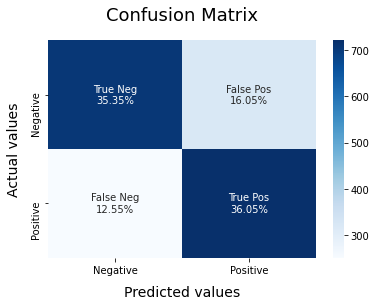

In [52]:
model_Evaluate(lg)

In [53]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB

In [54]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Accuracy of model on training data : 90.03750000000001
Accuracy of model on testing data : 70.15 

              precision    recall  f1-score   support

           0       0.73      0.67      0.70      1028
           1       0.68      0.73      0.70       972

    accuracy                           0.70      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.70      0.70      0.70      2000



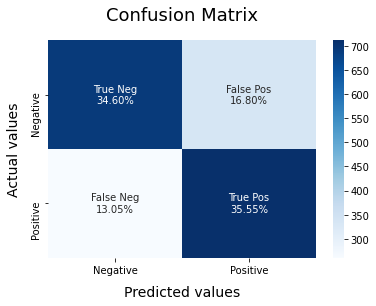

In [55]:
model_Evaluate(svm)

In [56]:
rf = RandomForestClassifier(max_depth=50)
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy of model on training data : 89.95
Accuracy of model on testing data : 68.8 

              precision    recall  f1-score   support

           0       0.73      0.62      0.67      1028
           1       0.66      0.76      0.70       972

    accuracy                           0.69      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.69      0.69      0.69      2000



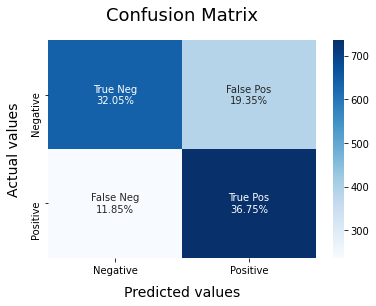

In [57]:
model_Evaluate(rf)

In [58]:
nb = BernoulliNB()
nb.fit(X_train, y_train)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Accuracy of model on training data : 89.0
Accuracy of model on testing data : 70.5 

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1028
           1       0.70      0.70      0.70       972

    accuracy                           0.70      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.71      0.70      0.71      2000



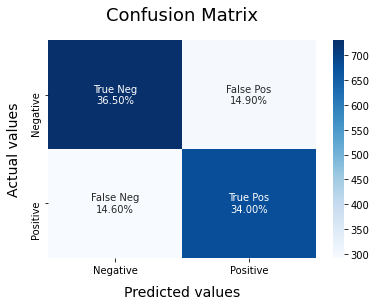

In [59]:
model_Evaluate(nb)

In [60]:
from sklearn.neural_network import MLPClassifier

In [61]:
mlp = MLPClassifier()

In [62]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Accuracy of model on training data : 99.6875
Accuracy of model on testing data : 65.25 

              precision    recall  f1-score   support

           0       0.67      0.64      0.66      1028
           1       0.64      0.66      0.65       972

    accuracy                           0.65      2000
   macro avg       0.65      0.65      0.65      2000
weighted avg       0.65      0.65      0.65      2000



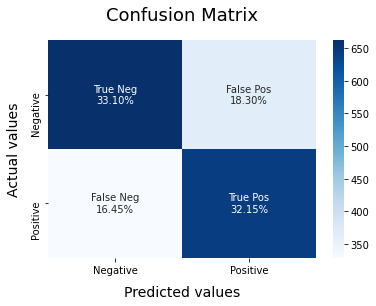

In [63]:
model_Evaluate(mlp)

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
neigh = KNeighborsClassifier(n_neighbors=90)

In [72]:
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=90, p=2,
                     weights='uniform')

Accuracy of model on training data : 72.3875
Accuracy of model on testing data : 69.39999999999999 

              precision    recall  f1-score   support

           0       0.75      0.61      0.67      1028
           1       0.66      0.78      0.71       972

    accuracy                           0.69      2000
   macro avg       0.70      0.70      0.69      2000
weighted avg       0.70      0.69      0.69      2000



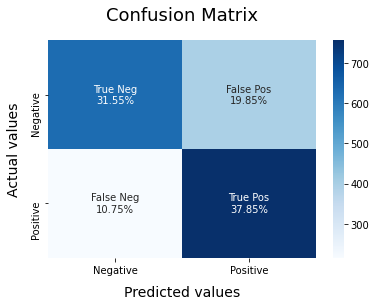

In [73]:
model_Evaluate(neigh)

In [74]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [75]:
lda = LinearDiscriminantAnalysis()

In [76]:
lda.fit(X_train.toarray(),y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

Accuracy of model on training data : 97.85000000000001
Accuracy of model on testing data : 61.85000000000001 

              precision    recall  f1-score   support

           0       0.63      0.61      0.62      1028
           1       0.60      0.62      0.61       972

    accuracy                           0.62      2000
   macro avg       0.62      0.62      0.62      2000
weighted avg       0.62      0.62      0.62      2000



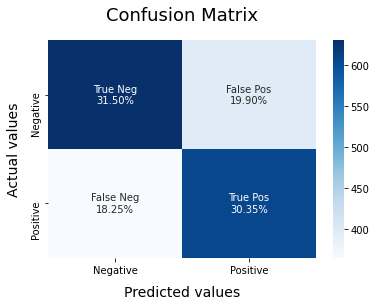

In [ ]:
model_Evaluate(lda)